<a href="https://colab.research.google.com/github/biangomes/projetos-e-estudos/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hipótese:** o desempenho do aluno melhora com uma mesada a mais.

In [34]:
# importando as bibliotecas de manipulacao
import pandas as pd

# importando as bibliotecas de processamento numerico
import numpy as np

# importando as bibliotecas de visualizacao de dados
import matplotlib.pyplot as plt

In [35]:
# criando um dataframe
alunos = pd.DataFrame({
    'André': {'Mesada': 36.02, 'Nota_Testao': 48},
    'Joao': {'Mesada': 11.83, 'Nota_Testao': 25},
    'Bia': {'Mesada': 22.0, 'Nota_Testao': 43},
    'Ana': {'Mesada': 24.0, 'Nota_Testao': 39},
    'José': {'Mesada': 100.0, 'Nota_Testao': 60},
    'Vinicius': {'Mesada': 10.0, 'Nota_Testao': 40},
    'Tulio': {'Mesada': 20.0, 'Nota_Testao': 48},
    'Josué': {'Mesada': 25.0, 'Nota_Testao': 47},
    'Antonella': {'Mesada': 22.0, 'Nota_Testao': 43},
})

# visualizando o dataframe criado
alunos

,André,Joao,Bia,Ana,José,Vinicius,Tulio,Josué,Antonella
Mesada,36.02,11.83,22.0,24.0,100.0,10.0,20.0,25.0,22.0
Nota_Testao,48.00,25.00,43.0,39.0,60.0,40.0,48.0,47.0,43.0


Como o formato não está como gostaríamos, uma vez que desejamos o nome dos alunos na esquerda, vamos utilizar o método `.T`, que faz a **transposição** das colunas x linhas.

In [36]:
# transposicao
alunos = alunos.T

# visualizando
alunos

,Mesada,Nota_Testao
André,36.02,48.0
Joao,11.83,25.0
Bia,22.00,43.0
Ana,24.00,39.0
José,100.00,60.0
Vinicius,10.00,40.0
Tulio,20.00,48.0
Josué,25.00,47.0
Antonella,22.00,43.0


Abaixo eu vou criar dois arrays, em que o primeiro aloca os dados da coluna `Mesada` e o segundo guarda os dados da coluna `Nota_Testao`. 

Na Regressão Linear Simples temos duas variáveis:

- **Variável preditora:** esta tem o poder de influenciar ou não sobre a variável alvo. No nosso caso será a coluna `Nota_Testao`, reconhecida como `x`.

- **Variável alvo:** é a variável que queremos prever. No nosso caso será a coluna `Mesada`, reconhecida como `y`.

In [41]:
# pego a Series 'Nota_Testao' e a uso em um array
x = np.array(alunos['Nota_Testao'])

# pego a Series 'Mesada' e a uso em um array
y = np.array(alunos['Mesada'])

In [42]:
print('Variável independente: ', x)
print('Variável dependente: ', y)

Variável independente:  [48. 25. 43. 39. 60. 40. 48. 47. 43.]
Variável dependente:  [ 36.02  11.83  22.    24.   100.    10.    20.    25.    22.  ]


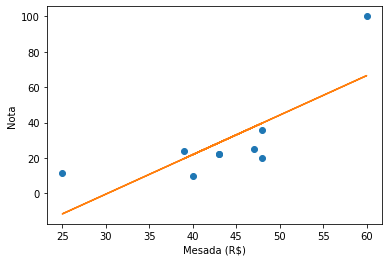

In [43]:
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
plt.xlabel('Mesada (R$)')
plt.ylabel('Nota')
plt.show();

Segundo a própria [documentação](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) do numpy, o método `numpy.polyfit()` modela com o método dos mínimos quadrados polinomiais.

Considere um polinômio $p$ dado por:

$$ p(x) = p[0].x^{deg} + ... + p[deg] $$

O polinômio acima retorna um vetor de coeficientes $p$ que minimiza o erro quadrático de ordem $deg, deg-1,...,0$.

A sua sintaxe geral é:

`numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)`,
em que:

- **x:** array, shape(M,), coordenada x de um espaço amostral de com M pontos `(x[i], y[i])`.

- **y:** array, shape(M,) ou (M,K). Vários conjuntos de datas de um espaço amostral que compartilha as mesmas coordenadas da abscissa (x) pode ser modelado de uma só vez utilizando um array bidimensional que contenha um conjunto por coluna.

- **deg:** int, grau do polinômio que quer ser modelado.

Os outros parâmetros são adicionais, portanto será ocultado deste trabalho. Segue o link da documentação oficial do `numpy` novamente: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html.

Os retornos da função são três:

- **p:** ndarray, com um shape de (deg + 1) ou (deg + 1, K) (para conj. bidimensionais).

- **residuals, rank, singular_values, rcond:** acontece somente se `full=True`. O `residuals` é a soma dos quadrados dos resíduos.

- **V:** ndarray, shape(M, M) ou (M, M, K). Presente apenas se `full=False` e `cov=True`. 

A equação que minimiza o erro dos mínimos quadrados é:

$$ E = \Sigma_{j=0}^{k} |p(x_{j}) - y_{j}|^2 $$

Considerando que já foi muito além do nível exigido, deixamos a continuação deste assunto para o curioso leitor.